# Lossのグラフ

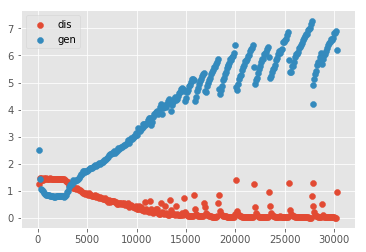

In [20]:
%matplotlib inline

#coding: utf-8
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import json
plt.style.use('ggplot') 

# グラフ
def plot_graph(result_dir = 'result_anime/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    iter = [d["iteration"] for d in log]
    epoch = [d["epoch"] for d in log]
    dis = [d["dis/loss"] for d in log]
    gen = [d["gen/loss"] for d in log]
    plt.scatter(iter, dis, label="dis")
    plt.scatter(iter, gen, label="gen")
    plt.legend()
    plt.show()
    
#plot_graph()
plot_graph(result_dir='result_anime_アズールレーン/')

# 最終出力

result_anime_アズールレーン/preview/image00010000.png


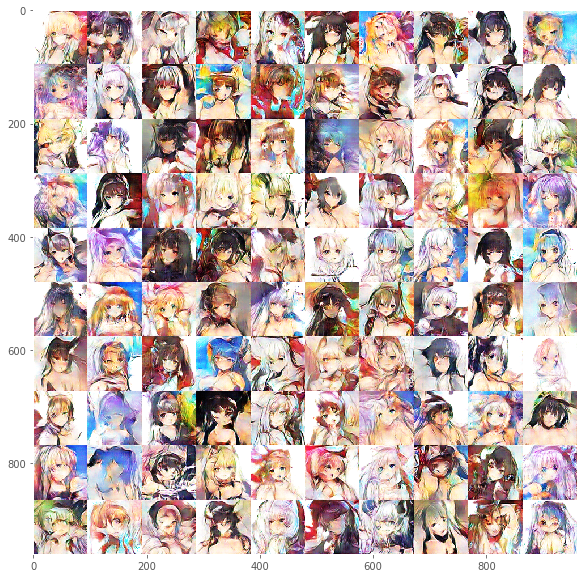

In [71]:
# 最終的な出力画像
import glob
plt.rcParams['figure.figsize'] = (10.0, 10.0) # 表示サイズを拡大

r_dir = 'result_anime_アズールレーン/'

last_file = glob.glob(os.path.join(r_dir, 'preview/*.png'))[-1]
im = Image.open(last_file)
print(last_file)
plt.grid(False)
plt.imshow(np.array(im))

# 出力の探索

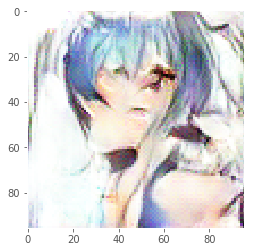

y: -3.2794013023376465
-----


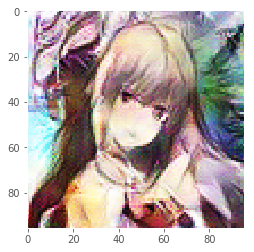

y: -1.9945824146270752
-----


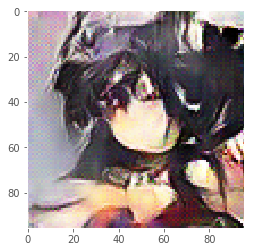

y: -6.941493511199951
-----


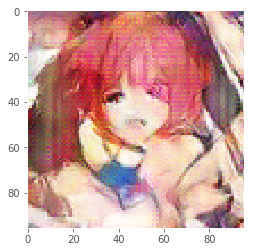

y: -1.1258867979049683
-----


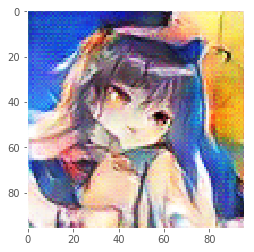

y: -3.8235373497009277
-----


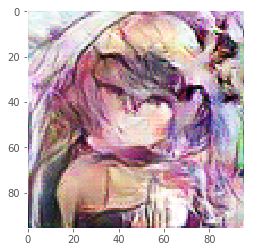

y: -7.366138458251953
-----


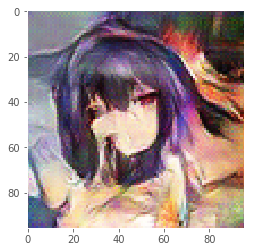

y: -2.927391529083252
-----


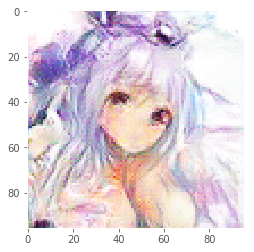

y: -2.710813522338867
-----


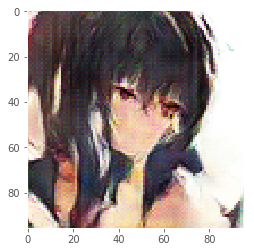

y: -6.160797119140625
-----


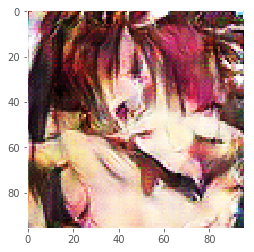

y: -4.122927665710449
-----


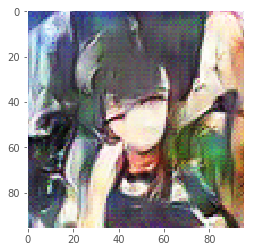

y: -6.700225830078125
-----


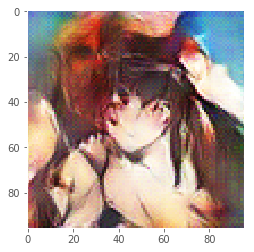

y: -4.024411201477051
-----


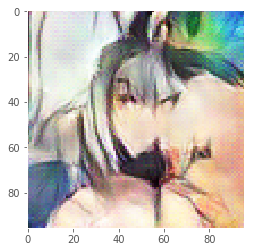

y: -8.568191528320312
-----


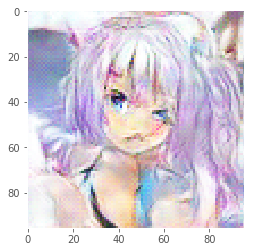

y: -3.8788466453552246
-----


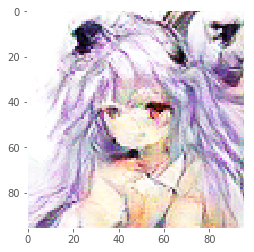

y: -3.529222011566162
-----


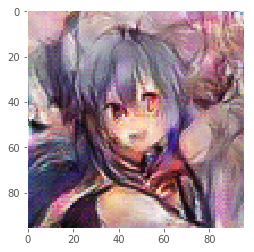

y: -4.156698226928711
-----


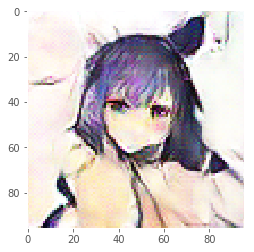

y: -9.071111679077148
-----


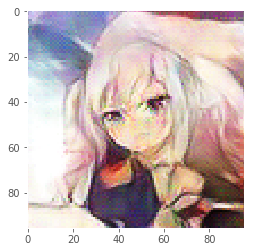

y: -2.4302947521209717
-----


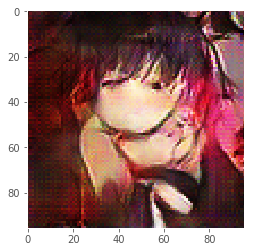

y: -3.0871357917785645
-----


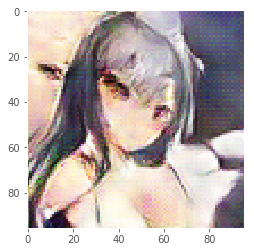

y: -4.11719274520874
-----


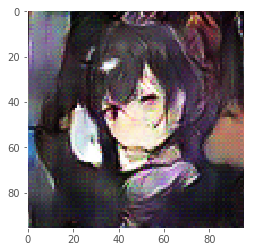

y: -7.385409832000732
-----


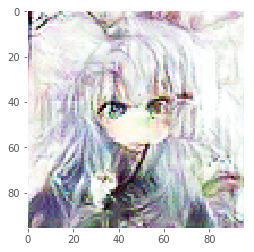

y: -3.5992648601531982
-----


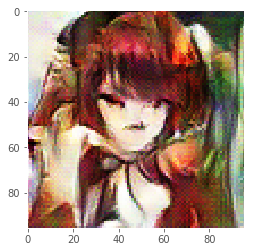

y: -7.868438720703125
-----


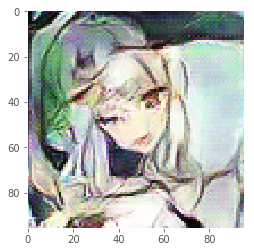

y: -10.767670631408691
-----


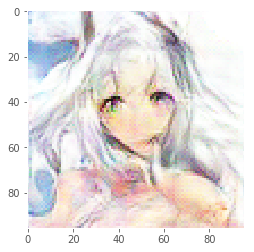

y: -1.8436000347137451
-----


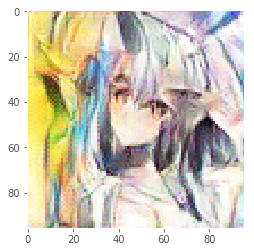

y: -4.742743015289307
-----


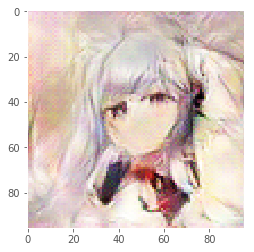

y: -3.725245475769043
-----


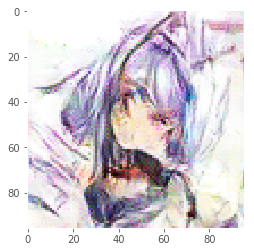

y: -4.135331153869629
-----


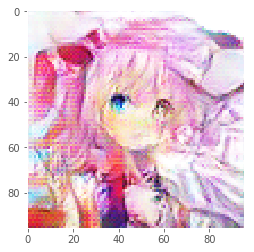

y: -4.943812370300293
-----


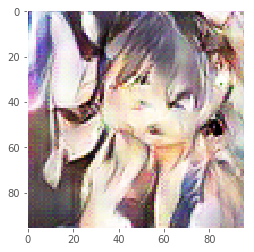

y: -6.206037998199463
-----


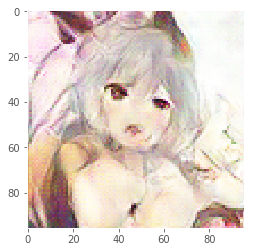

y: -3.5825507640838623
-----


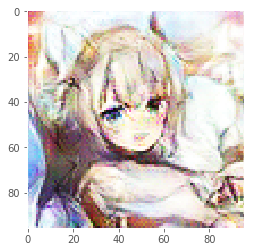

y: -2.041266441345215
-----


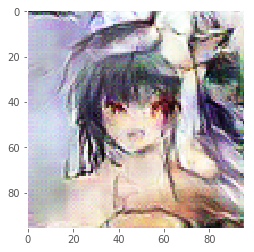

y: -5.426479339599609
-----


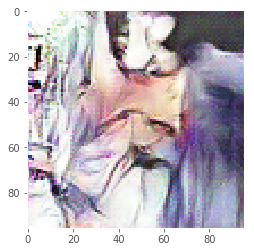

y: -5.559329032897949
-----


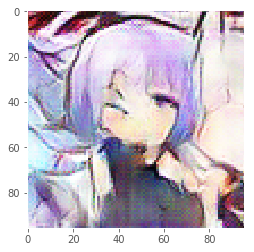

y: -9.472295761108398
-----


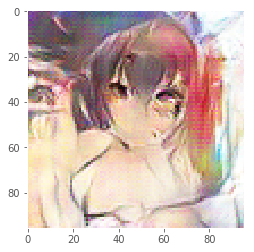

y: -4.961566925048828
-----


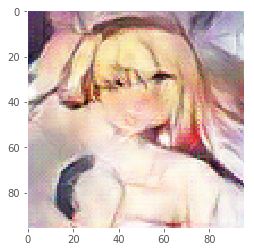

y: -5.020364761352539
-----


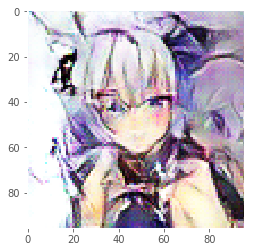

y: -8.523465156555176
-----


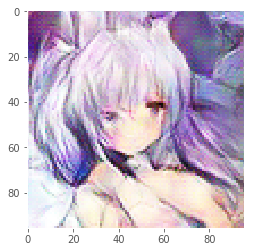

y: -5.4031524658203125
-----


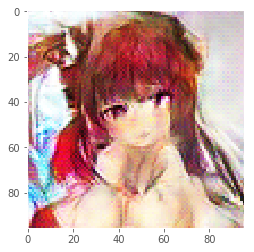

y: -2.273083448410034
-----


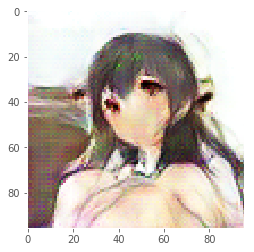

y: -2.925180673599243
-----


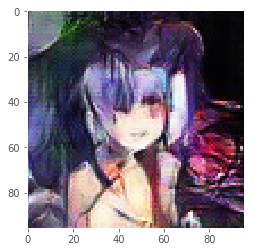

y: -6.750222206115723
-----


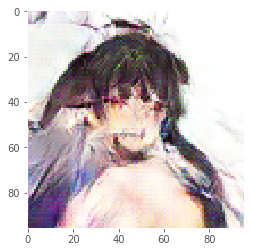

y: -5.27747106552124
-----


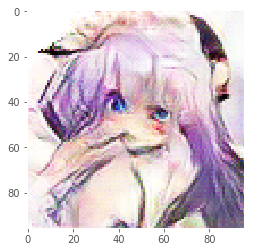

y: -6.197434902191162
-----


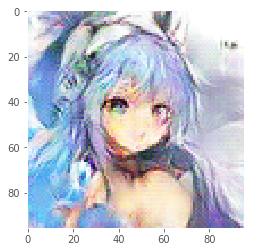

y: -7.576322555541992
-----


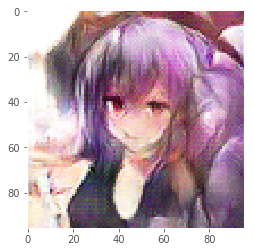

y: -3.2705748081207275
-----


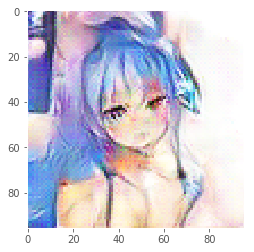

y: -3.8336405754089355
-----


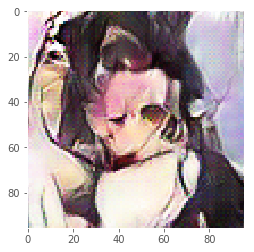

y: -5.736342430114746
-----


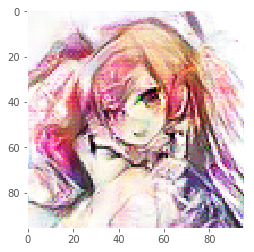

y: -5.231411933898926
-----


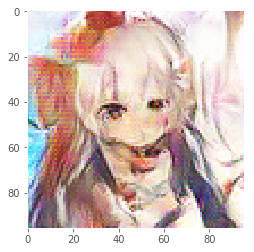

y: -3.4600746631622314
-----


In [73]:
%matplotlib inline

import numpy as np
from PIL import Image

import chainer
import chainer.cuda
from chainer import Variable, serializers
from net96 import Generator, Discriminator

gen_npz = 'result_anime_アズールレーン/gen_iter_30000.npz'
dis_npz = 'result_anime_アズールレーン/dis_iter_30000.npz'
gen = Generator(100)
dis = Discriminator(init_sigma=0.0)
serializers.load_npz(gen_npz, gen)
serializers.load_npz(dis_npz, dis)


def out_generated_image(gen, dis, seed=0, batchsize=50):
    #np.random.seed(seed)
    z = Variable(np.asarray(gen.make_hidden(batchsize)))
    with chainer.using_config('train', False):
        x = gen(z)
        y = dis(x)
    x = chainer.cuda.to_cpu(x.data)
    y = chainer.cuda.to_cpu(y.data)
    
    #np.random.seed()
    x = np.asarray(np.clip(x * 128.0 + 128.0, 0.0, 255.0), dtype=np.uint8)
    x = x.reshape((batchsize, 3, 96, 96))    
    x = x.transpose(0, 2, 3, 1)
    return x, y, z       # x: 生成画像、y: disの判別結果、z: 乱数(潜在変数)

xs, ys, zs = out_generated_image(gen, dis, 0)

for x, y, z in zip(xs, ys, zs):
    
    # y が小さい -> dis の誤差が大きい -> dis が gen の結果に騙された
    # ただ実際は、目で見た画像の出来と dis の誤差との関係は不明
    th = -1
    if y < th:
        plt.imshow(x.astype(np.uint8))
        plt.grid(False)
        plt.show()
        print('y: {}'.format(y[0]))
        print('-----')
        #print(z.ｔranspose(3,0,1,2))


# CIFAR-10のテスト

In [ ]:
%matplotlib inline
#coding: utf-8
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

im = Image.open('old/example_image.png')
plt.imshow(np.array(im))

# 画像をランダム表示

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import six

if six.PY3:
    import _pickle as cPickle
else:
    import cPickle


def unpickle(f):
    fo = open(f, 'rb')
    if six.PY3:
        d = cPickle.load(fo, encoding='latin1')
    else:
        d = cPickle.load(fo)
    fo.close()
    return d

# ラベル名をロード
label_names = unpickle("cifar10/batches.meta")["label_names"]
d = unpickle("cifar10/data_batch_1")
data = d["data"]
labels = np.array(d["labels"])
nsamples = len(data)

print(label_names)

# 各クラスの画像をランダムに10枚抽出して描画
nclasses = 10
pos = 1
for i in range(nclasses):
    # クラスiの画像のインデックスリストを取得
    targets = np.where(labels == i)[0]
    np.random.shuffle(targets)
    # 最初の10枚の画像を描画
    for idx in targets[:10]:
        plt.subplot(10, 10, pos)
        img = data[idx]
        # (channel, row, column) => (row, column, channel)
        plt.imshow(img.reshape(3, 32, 32).transpose(1, 2, 0))
        plt.axis('off')
        label = label_names[i]
        pos += 1
plt.show()